# CSE428 Week 3 Coding Assignment

In [2]:
NAME = "Tanvir Ahmed Palok"
ID = "19301012"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [3]:
# Import libraries 

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....
from skimage import io, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.util import pad, random_noise
from scipy import signal
plt.rcParams['figure.dpi'] = 100

In [4]:
# Define helper functions

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....
def plot_image(img, figsize =(5,5)):
  plt.figure(figsize = figsize)
  if len(img.shape)==2:
    plt.imshow(img, cmap = 'gray')
  else:
    plt.imshow(img)
  plt.axis('off')
  plt.show()
  print("Image shape : ",img.shape)

def plot_kernel(kernel, cmap='Reds'):
  plt.imshow(kernel, cmap = cmap)
  plt.colorbar()
  plt.show()
  print('Kernel shape: ', kernel.shape)

def gaussian_kernel(width = 1, size = 10):
  gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
  kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
  return kernel/np.sum(kernel)




## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


In [7]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = rgb2gray(io.imread('/content/sample.jpg'))
Idown = image[::3, :: 3]
Idown.shape


(427, 320)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

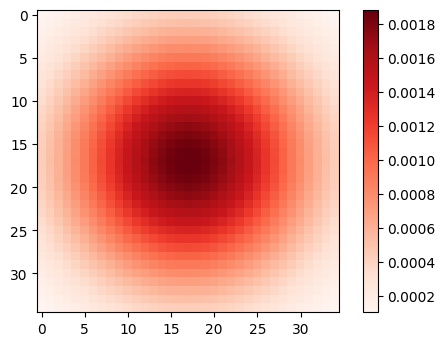

Kernel shape:  (35, 35)


In [8]:
# Define a gaussian kernel of size (35, 35)

kernel = gaussian_kernel(10,35)
kernel.shape
plot_kernel(kernel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


Time elapsed using direct method of correlation:  3.5950759999999997 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


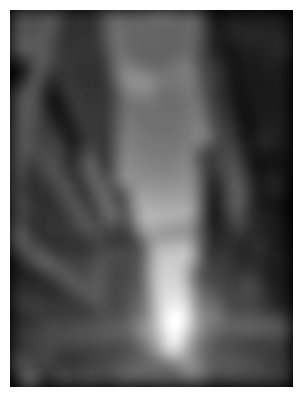

Image shape :  (427, 320)


In [9]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
start_time = time.clock()
 
filetred_image_direct = signal.correlate(Idown, kernel, mode='same', method='direct') # TO-BE-COMPLETED
 
print("Time elapsed using direct method of correlation: ", time.clock() - start_time, "seconds")
plot_image(filetred_image_direct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


Time elapsed using fft method of correlation:  0.0898159999999999 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


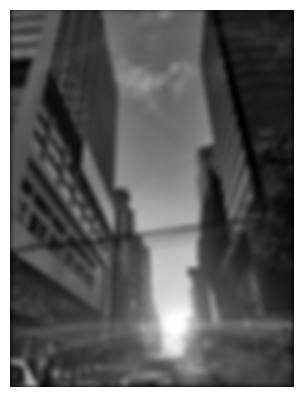

Image shape :  (1280, 960)


In [10]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.clock()
filetred_image_fft = signal.correlate(image, kernel, mode='same', method='fft')  # TO-BE-COMPLETED
 
print("Time elapsed using fft method of correlation: ", time.clock() - start_time, "seconds")
plot_image(filetred_image_fft)

### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.


FFT convolution using the fft function was found to be faster than conv for all length and 

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


In [11]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = io.imread('/content/sample.jpg')
 # TO-BE-COMPLETED
Idown = image[::3, ::3]
Idown.shape

(427, 320, 3)

In [12]:
# Define any symmetric kernel of size (105, 105)
kernel_symmetric = np.zeros((105,105)) # TO-BE-COMPLETED
for i in range(105):
    for j in range(105):
        kernel_symmetric[i][j] = i+j-104
        kernel_symmetric[i][j] = kernel_symmetric[i][j]/104
        
print(kernel_symmetric)


[[-1.         -0.99038462 -0.98076923 ... -0.01923077 -0.00961538
   0.        ]
 [-0.99038462 -0.98076923 -0.97115385 ... -0.00961538  0.
   0.00961538]
 [-0.98076923 -0.97115385 -0.96153846 ...  0.          0.00961538
   0.01923077]
 ...
 [-0.01923077 -0.00961538  0.         ...  0.96153846  0.97115385
   0.98076923]
 [-0.00961538  0.          0.00961538 ...  0.97115385  0.98076923
   0.99038462]
 [ 0.          0.00961538  0.01923077 ...  0.98076923  0.99038462
   1.        ]]


In [13]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = np.random.randn(105,105) # TO-BE-COMPLETED

print(kernel_asymmetric)

[[ 0.6944136  -0.92264879  0.19468577 ...  1.05781792 -1.53812331
   1.19599997]
 [-0.05403634 -0.05769242 -1.12414444 ...  1.97592684  1.00495393
   0.71223072]
 [-0.4741552  -0.1731563  -0.38202508 ... -1.05098152  0.54546202
  -0.45491737]
 ...
 [-0.71108343 -0.0795373   2.05687232 ...  0.01217431 -2.4357808
  -0.36597721]
 [ 2.08777474 -0.82414951 -2.90465847 ...  1.27357887  0.90477082
   0.1578748 ]
 [-0.08935262  1.76823725  1.10110881 ... -0.86562114 -0.61756976
   0.78019637]]


In [14]:
# Filter the image with the symmetric kernel using the correlation function
for i in range(3):
    filtered_image_symmetric = signal.correlate(image[:,:,i], kernel_symmetric, mode = "same", method = "auto")# TO-BE-COMPLETED
    filtered_image_asymmetric = signal.correlate(image[:,:,i], kernel_asymmetric, mode = "same", method = "auto") # TO-BE-COMPLETED


(-0.5, 959.5, 1279.5, -0.5)

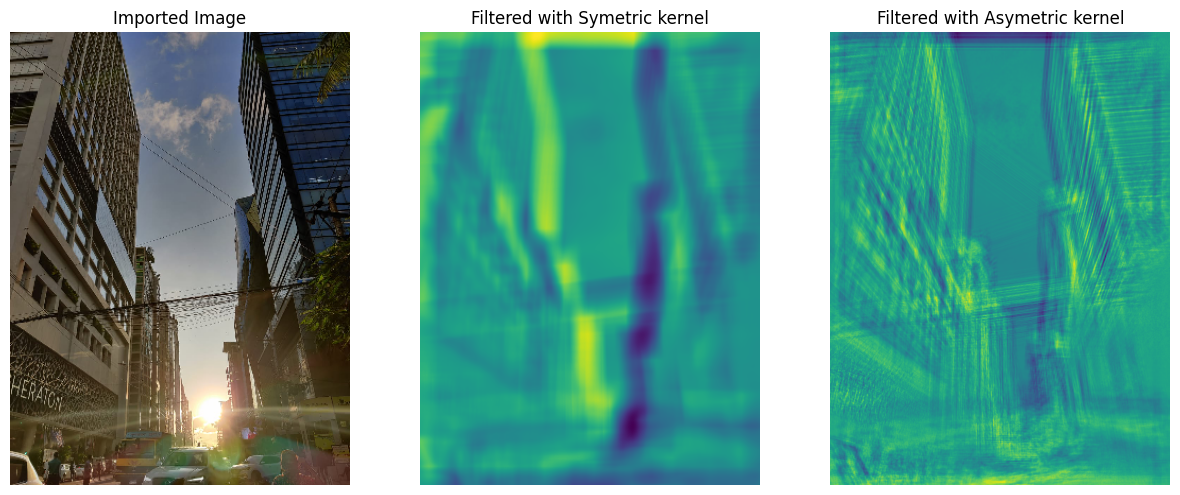

In [15]:
# Display the images side by side (with proper labeling, which is which)
plt.figure(figsize= (15,6))
plt.subplot(1,3,1)
plt.imshow(Idown)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(1,3,2)
plt.imshow(filtered_image_symmetric)
plt.title("Filtered with Symetric kernel")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(filtered_image_asymmetric)
plt.title("Filtered with Asymetric kernel")
plt.axis("off")

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.
After using symetric karnel I can see my image getting blurred(Lower variation getting preserved but higher variation getting discarded).
After using asymetric karnel I can see my image getting sharper(Lower variation is getting discarded and higher variation is getting preserved).That is why the edges are more clear and sharper in 2nd image. 

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

(-0.5, 959.5, 1279.5, -0.5)

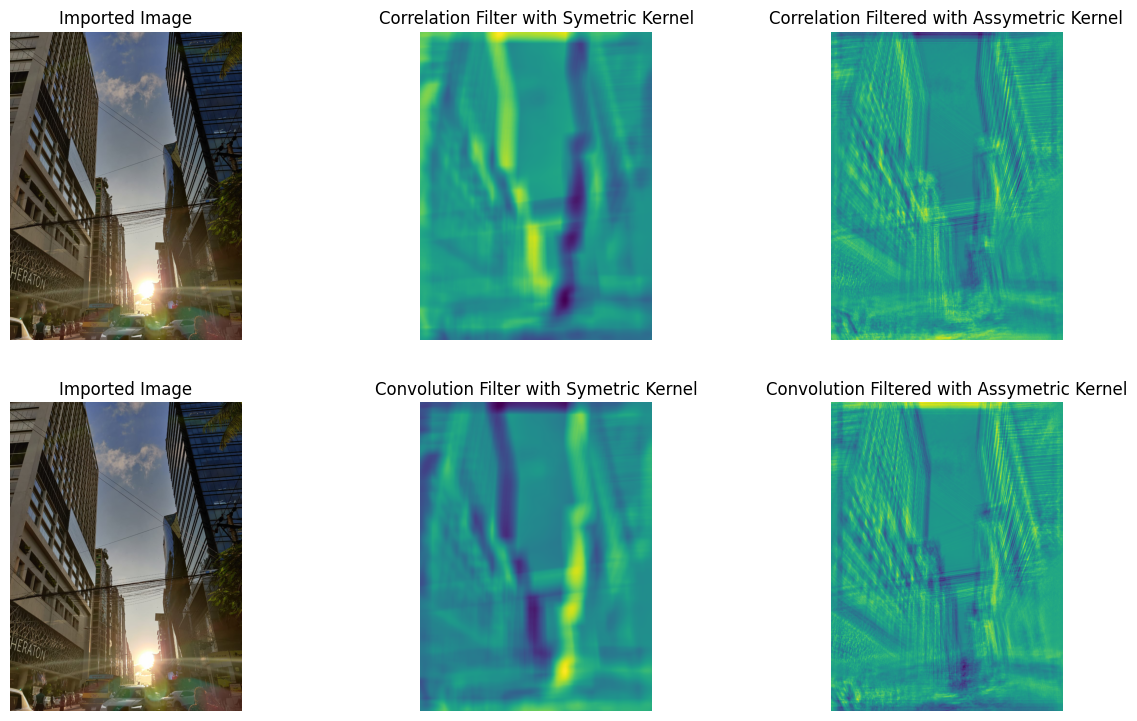

In [16]:
# Filter the image with the asymmetric kernel using the convolution function

for i in range(3):
    filtered_image_symmetric_C = signal.convolve(image[:,:,i], kernel_symmetric, mode='same', method='auto')
    filtered_image_asymmetric_C = signal.convolve(image[:,:,i], kernel_asymmetric, mode='same', method='auto')
    
plt.figure(figsize= (15,9))
plt.subplot(2,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(2,3,2)
plt.imshow(filtered_image_symmetric)
plt.title("Correlation Filter with Symetric Kernel")
plt.axis("off")
plt.subplot(2,3,3)
plt.imshow(filtered_image_asymmetric)
plt.title("Correlation Filtered with Assymetric Kernel")
plt.axis("off")
plt.subplot(2,3,4)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(2,3,5)
plt.imshow(filtered_image_symmetric_C)
plt.title("Convolution Filter with Symetric Kernel")
plt.axis("off")
plt.subplot(2,3,6)
plt.imshow(filtered_image_asymmetric_C)
plt.title("Convolution Filtered with Assymetric Kernel")
plt.axis("off")

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.



We know, convolution is one kind of correlation where Kernel is transposed.After observing my output, I can say correlation and convolution of symmetric kernel is almost same but in convolution the colors intensity gets more smooth.In asymetric kernel,convolution creates a little blur effect and correlation gives more sharper image then convolution of asymetric kernel.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image= rgb2gray(io.imread('/content/diamond2.jpg'))
io.imshow(image) # TO-BE-COMPLETED

In [ ]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[-4, -2, 0], # TO-BE-COMPLETED
                     [-2, 0, 2], # TO-BE-COMPLETED
                     [0, 2, 4]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, -2, -4], # TO-BE-COMPLETED
                     [2, 0, -2], # TO-BE-COMPLETED
                     [4, 2, 0]]) # TO-BE-COMPLETED

In [ ]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected = signal.correlate(image, kernel_1, mode = 'same', method = 'auto') # TO-BE-COMPLETED

# detect the second pair using image filtering with kernel_2

second_pair_detected = signal.correlate(image, kernel_2, mode = 'same', method = 'auto')   # TO-BE-COMPLETED

# plot the two filtered images side by side

plt.figure(figsize= (18,6))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Gray Image")
plt.subplot(1,3,2)
plt.imshow(first_pair_detected)
plt.title("First parallel pair detected")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(second_pair_detected)
plt.title("Second parallel pair detected")
plt.axis("off")

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


I applied a Sobel mask to find diagonal edges. I chose not to use Prewitt masks because they have somewhat better noise-suppression properties than Sobel masks. After I changed the coefficients, the results were weird.Other kernels, such as Prewitt and Adibs kernel, might also be able to do this; my kernels are not the only ones that can.

Prewitt:
 0  1 1

-1  0 1

-1 -1 0 


-1 -1 0 

-1  0 1

 0  1 1


 Sobel:

 0  1 2

-1  0 1

-2 -1 0



-2 -1 0

-1  0 1

 0  1 2

## **The END**